# Manipulating text using Python

This section introduces you to the very basics of manipulating text in Python.

After reading this section, you should:

 - understand the difference between rich text, structured text and plain text
 - understand the concept of text encoding
 - know how to load plain text files into Python and manipulate their content

## Computers and text

Computers can store and represent text in different formats. Knowing the distinction between different types of text is crucial for processing them programmatically.

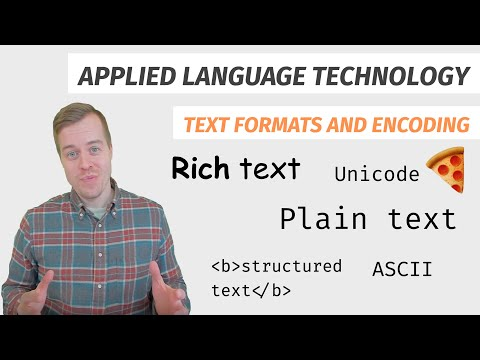

In [6]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('P-om89HKx80', height=350, width=600)

### What is rich text?

Word processors, such as Microsoft Word, produce [rich text](https://en.wikipedia.org/wiki/Formatted_text), that is, text whose appearance has been formatted or styled in a specific way.

Rich text allows defining specific visual styles for document elements. Headers, for example, may use a different font than the body text, which may in turn feature *italic* or **bold** fonts for emphasis. Rich text can also include various types of images, tables and other document elements.

Rich text is the default format for modern what-you-see-is-what-you-get word processors.

### What is plain text?

Unlike rich text, [plain text](https://en.wikipedia.org/wiki/Plain_text) does not contain any information about the visual appearance of text, but consists of *characters* only.

Characters, in this context, refers to letters, numbers, punctuation marks, spaces and line breaks.

The definition of plain text is fairly loose, but generally the term refers to text which lacks any formatting or style information.


### What is structured text?

Structured text may be thought of as a special case of plain text, which includes character sequences that are used to format the text for display.

Forms of structured text include text described using mark-up languages such as XML, Markdown or HTML.

The example below shows a plain text sentence wrapped into HTML tags for paragraphs `<p>`. 

The opening tag `<p>` and the closing tag `</p>` instruct the computer that any content placed between these tags form a paragraph.

```
<p>This is an example sentence.</p>
```

This information is used for structuring plain text when *rendering* text for display, typically by styling its appearance.

If you double-click any content cell in this Jupyter Notebook, you will see the underlying structured text in Markdown.

Running the cell renders the structured text for visual inspection!

### Why does this matter?

If you collect a bunch of texts for a corpus, chances are that some originated in rich or structured format, depending on the medium these texts came from.

If you collect printed documents that have been digitized using a technique such as [optical character recognition](https://en.wikipedia.org/wiki/Optical_character_recognition) (OCR) and subsequently converted from rich into plain text, the removal of formatting information is likely to introduce errors into the resulting plain text. Working with this kind of "dirty" OCR can have an impact on the results of text analysis (Hill & Hengchen [2019](https://doi.org/10.1093/llc/fqz024)).

If you collect digital documents by scraping discussion forums or websites, you are likely to encounter traces of structured text in the form of markup tags, which may be carried over to plain text during conversion.

Plain text is by far the most interchangeable format for text, as it is easy to read for computers. This is why programming languages work with plain text, and if you plan to use programming languages to manipulate text, you need to know what plain text is. 

To summarise, when working with plain text, you may need to deal with traces left by conversion from rich or structured text.

## Text encoding

To be read by computers, plain text needs to be *encoded*. This is achieved using *character encoding*, which maps characters (letters, numbers, punctuation, whitespace ...) to a numerical representation understood by the computer.

Ideally, we should not have to deal with low-level operations such as character encoding, but practically we do, because there are multiple systems for encoding characters, and these codings are not compatible with each other. This is the source of endless misery and headache when working with plain text.

There are two character encoding systems that you are likely to encounter: ASCII and Unicode.

### ASCII

[ASCII](https://en.wikipedia.org/wiki/ASCII), which stands for American Standard Code for Information Interchange, is a pioneering character encoding system that has provided a foundation for many modern character encoding systems.

ASCII is still widely used, but is very limited in terms of its character range. If your language happens to include characters such as ä or ö, you are out of luck with ASCII.

### Unicode

[Unicode](https://en.wikipedia.org/wiki/Unicode) is a standard for encoding text in most writing systems used across the world, covering nearly 140 000 characters in modern and historic scripts, symbols and emoji.

For example, the pizza slice emoji 🍕 has the Unicode "code" `U+1F355`, whereas the corresponding code for a whitespace is `U+0020`.

Unicode can be implemented by different character encodings, such as [UTF-8](https://en.wikipedia.org/wiki/UTF-8), which is defined by the Unicode standard.

UTF-8 is backwards compatible with ASCII. In other words, the ASCII character encodings form a subset of UTF-8, which makes our life much easier. 

Even if a plain text file has been *encoded* in ASCII, we can *decode* it using UTF-8, but **not vice versa**.

## Loading plain text files into Python

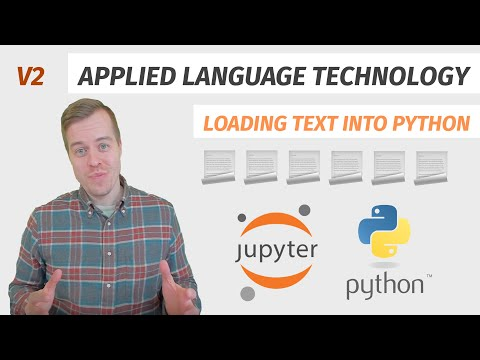

In [7]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('ulRFLvNkhHA', height=350, width=600)

Plain text files can be loaded into Python using the `open()` function.

The first argument to the `open()` function must be a string, which contains a *path* to the file that is being opened.

In this case, we have a path that points towards a file named `NYT_1991-01-16-A15.txt`, which is located in a directory named `data`. In the definition of the path, the directory and the filename are separated by a backslash `/`.

To access the file that this path points to, we must provide the path as a string object to the `file` argument of the `open()` function:

```
open(file='data/NYT_1991-01-16-A15.txt', mode='r', encoding='utf-8')
```

Before proceeding any further, let's focus on the other arguments provided to the `open()` function.

By default, Python 3 assumes that the text is encoded using UTF-8, but we can make this explicit using the `encoding` argument. 

The `encoding` argument takes a string as input: we pass the string `utf-8` to the argument to declare that the plain text is encoded in UTF-8.

We also use the `mode` argument to define that we only want to open the file for *reading*, which is done by passing the string `r` to the argument.

Finally, we use the `open()` function in combination with the `with` statement, which ensures that the file will be closed after performing whatever we do within the *indented* block of code that follows the `with` statement. This prevents the file from consuming memory and resources after we no longer need it.

In [8]:
# Open a file and assign it to the variable 'file'
with open(file='data/NYT_1991-01-16-A15.txt', mode='r', encoding='utf-8') as file:
    
    # The 'with' statement must be followed by an indented code block.
    # Here we call the read() method to read the file contents and 
    # assign the result under the variable 'text'.
    text = file.read()

As you can see, the `with` statement and the `open()` function are followed by the statement `as` and a variable named `file`.

This tells Python to assign whatever is returned by the `open()` function under the variable `file`.

If we now call the variable `file`, we get a Python `TextIOWrapper` object that contains three arguments: the path to the file under the argument `name` and the `mode` and `encoding` arguments that we specified above.

In [9]:
# Call the variable to examine the object
file

<_io.TextIOWrapper name='data/NYT_1991-01-16-A15.txt' mode='r' encoding='utf-8'>

Keep in mind that in the indented code block following the `with` statement, we called the `read()` method of the `TextIOWrapper` object.

This method read the contents of the file, which we assigned under the variable `text`.

However, if we attempt to call the `read()` method for the variable `file` outside the `with` statement, Python will raise an error, because the file has been closed.

In [10]:
# Attempt to use the read() method to read the file content
file.read()

ValueError: I/O operation on closed file.

This behaviour is expected, as we want the file to be closed, so that it does not consume memory or resources now that we no longer need it. This is especially important when working with thousands of files, as every open file will take up memory and resources.

Let's check the output from applying the `read()` method, which we stored under the variable `text` within the `with` statement.

The text is fairly long, so let's just take a slice of the text containing the first 500 characters, which can be achieved using brackets `[:500]`.

As we learned in [Part I](../part_i/02_getting_started_with_python.ipynb), adding brackets directly after the name of a variable allows accessing parts of the object, if the object in question allows this.

For example, the expression `text[1]` would retrieve the character at position 1 in the string object under the variable `text`.

Adding the colon `:` as a prefix to the number instructs Python to retrieve all characters contained in the string up to the 500th character.

In [ ]:
# Retrieve the first 500 characters under the variable 'text'
text[:500]

Most of the text is indeed legible, but there are some strange character sequences, such as `\ufeff` in the very beginning of the text, and the numerous `\n` sequences occurring throughout the text.

The `\ufeff` sequence is simply an explicit declaration ("signature") that the file has been encoded using UTF-8. Not all UTF-8 encoded files contain this sequence.

The `\n` sequences, in turn, indicate a line change.

This becomes evident if we use Python's `print()` function to print the first 1000 characters stored in the `text` variable.

In [ ]:
# Print the first 1000 characters under the variable 'text'
print(text[:1000])

As you can see, Python knows how to interpret `\n` character sequences and inserts a line break if it encounters this sequence when printing the contents of the string object.

We can also see that the first few lines of the file contain metadata on the article, such as its name, author and source. This information precedes the body text.

## Manipulating text

In [ ]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('v4FY6TXt0PU', height=350, width=600)

Because the entire text stored under the variable `text` is a string object, we can use all methods available for manipulating strings in Python.

Let's use the `replace()` method to replace all line breaks `"\n"` with empty strings `""` and store the result under the variable `processed_text`. 

We then use the `print()` function to print out a slice containing the first 1000 characters using the brackets `[:1000]`.

In [11]:
# Replace line breaks \n with empty strings and assign the result to 
# the variable 'processed_text'
processed_text = text.replace('\n', '')

# Print out the first 1000 characters under the variable 'processed_text'
print(processed_text[:1000])

﻿U.S. TAKING STEPS TO CURB TERRORISM: F.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRONNew York Times (1923-Current file); Jan 16, 1991;ProQuest Historical Newspapers: The New York Times with Index pg. A15U.S. TAKING STEPS TO CURB TERRORISMF.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRON   The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday.   The announcement came as security precautions were tightened throughout the United States. From financial exchanges in lower Manhattan to cloakrooms in Washington and homeless shelters in California, unfamiliar rituals were the order of the day. In many cities, identification badges were being given close scrutiny in office buildings that used to be open to anyone.   Concerns about terrorist attack disrupted other daily routines as well. No fast-food deliveries are being allowed at t

As you can see, all of the text is now clumped together. We can, however, still identify the beginning of each paragraph, which are marked by three whitespaces.

Note that replacing the line breaks also causes the article metadata to form a single paragraph, which is also missing some whitespace characters. For this reason, one must always pay attention to unwanted effects of replacements and other transformations!

However, if we were only interested in the body text of the article, we can now easily remove the metadata, as we know that it is separated from the body text by three whitespace characters.

The easiest way to do this is to use the `split()` method to split the string into a list by using three whitespace characters as the separator.

Let's assign the result under the same variable, that is, `processed_text`, and print out the result.

In [12]:
# Use the split() method with three whitespaces as a separator. Assign the
# result under the variable 'processed_text'.
processed_text = processed_text.split(sep='   ')

# Print out the result under 'processed_text'
print(processed_text)

['\ufeffU.S. TAKING STEPS TO CURB TERRORISM: F.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRONNew York Times (1923-Current file); Jan 16, 1991;ProQuest Historical Newspapers: The New York Times with Index pg. A15U.S. TAKING STEPS TO CURB TERRORISMF.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRON', 'The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday.', 'The announcement came as security precautions were tightened throughout the United States. From financial exchanges in lower Manhattan to cloakrooms in Washington and homeless shelters in California, unfamiliar rituals were the order of the day. In many cities, identification badges were being given close scrutiny in office buildings that used to be open to anyone.', 'Concerns about terrorist attack disrupted other daily routines as well. No fast-food deliveries are being al

If you examine the output, you will see that the `split()` method returned a list of string objects. Let's quickly verify this by checking the type of the object stored under `processed_text`.

In [ ]:
# Check the type of the object under 'processed_text'
type(processed_text)

The metadata is stored in the first item in the list, as the first sequence of three whitespace characters was found where the metadata ends. This is where we first split the string object.

Let's fetch the first item in the list – remember that Python starts counting from zero, which means that the item we want to access can be found at index `0`.

In [ ]:
# Retrieve the string object at index 0 from the list 'processed_text'
processed_text[0]

If we want to remove the metadata and retain just the body text, we can use the `pop()` method of a list object.

This method expects an integer as input, which corresponds to the index of an item that we want to remove from the list.

In [ ]:
# Call the pop() method of the list under 'processed_text' and the
# index of the item to be removed.
processed_text.pop(0)

If you are wondering why we do not assign the result into a variable, the answer is because Python lists are *mutable*, that is, they can be manipulated in place.

In other words, the `pop()` method can modify the list without "updating" the variable by reassigning the value under the same variable name.

Let's check the result by retrieving the first three items in the list `processed_text`.

In [ ]:
# Retrieve the first three items in the list 'processed_text'
processed_text[:3]

As you can see, the first item in the list no longer corresponds to the metadata!

In [ ]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('iabwQKS5lVk', height=350, width=600)

If we want to convert the list back into a string, we can use the `join()` method of a string object.

The `join()` method expects an *iterable* as input, that is, something that can be iterated over, such as a Python list or a dictionary.

This is where things may get a little confusing: the `join()` method must be called on a *string* that will be used to join the items in the iterable!

In this case, we want to use the original sequence of characters that were used to separate paragraphs of text – a line break and three whitespaces – as the string object that joins the items.

In [13]:
# Use the join() method to join the items in the list 'processed_text' using
# the string object '\n   ' – a line break and three whitespaces. Store the 
# result under the variable of the same name.
processed_text = '\n   '.join(processed_text)

# Check the result by printing the first 1000 characters of the resulting 
# string object under 'processed_text'
print(processed_text[:1000])

﻿U.S. TAKING STEPS TO CURB TERRORISM: F.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRONNew York Times (1923-Current file); Jan 16, 1991;ProQuest Historical Newspapers: The New York Times with Index pg. A15U.S. TAKING STEPS TO CURB TERRORISMF.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRON
   The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday.
   The announcement came as security precautions were tightened throughout the United States. From financial exchanges in lower Manhattan to cloakrooms in Washington and homeless shelters in California, unfamiliar rituals were the order of the day. In many cities, identification badges were being given close scrutiny in office buildings that used to be open to anyone.
   Concerns about terrorist attack disrupted other daily routines as well. No fast-food deliveries are being allowed a

As you can see, applying the `join()` method returns a string object with the original paragraph breaks!

In [ ]:
# Run this cell to view a YouTube video related to this topic
from IPython.display import YouTubeVideo
YouTubeVideo('HEinzGt8LG4', height=350, width=600)

If you examine the text closely, you can also see remnants of the digitalisation process: the application of optical character recognition, which was discussed [above](#Why-does-this-matter?), has resulted in a mixture of various types of quotation marks, such as `"`, `“`, `”`, `’’` and `‘‘` (two single quotation marks), being used in the text.

If we were interested in retrieving quotes from the body text, it would be good to use the quotation marks consistently. Let's choose `"` (a single double-quote) as our preferred quotation mark.

We could replace each quotation mark with this character using the `replace()` method, but applying this method separately for each type of quotation mark would be tedious.

To make the process more efficient, we can leverage two other Python data structures: *lists* and *tuples*.

Let's start by defining a list named `pipeline`. We can create and populate a list by simply placing objects within brackets `[]`. Each list item must be separated by a comma (`,`).

As we saw above, the `replace()` method takes two strings as inputs.

To combine two strings into a single Python object, the most obvious candidate is a data structure named *tuple*, which consist of finite, ordered lists of items.

Tuples are marked by parentheses `( )`, and the items in a tuple are also separated by a comma.

In each tuple, we place the character to be replaced in the first string, and its replacement in the second string.

In [15]:
# Define a list with four tuples, which each consist of two strings: the character
# to be replaced and its replacement.
pipeline = [('“', '"'), ('´´', '"'), ('”', '"'), ('’’', '"')]

This also illustrates how different data structures are often nested in Python: the list consists of tuples, and the tuples consist of string objects.

We can now perform a `for` loop over each item in the list, which iterates through each item in the order in which they appear in the list.

Each item in the list consists of a tuple, which contains two strings.

Note that to enter a `for` loop, Python expects the next line of code to be indented. Press the <kbd>Tab ↹</kbd> key on your keyboard to move the cursor.

What happens next is exactly same that we did before with using the `replace()` method, but instead of manually defining the strings that we want to replace, we use the strings contained in the variables `old` and `new`!

After each loop, we automatically update the string object stored under the variable `processed_text`.

In [16]:
# Loop over tuples in the list 'pipeline'. Each tuple has two values, which we 
# assign to variables 'old' and 'new' on the fly!
for old, new in pipeline:
    
    # Use the replace() method to replace the string under the variable 'old' 
    # with the string under the variable new 'new'
    processed_text = processed_text.replace(old, new)

Let's examine the output by printing out the string under the variable `processed_text`.

In [17]:
# Print the string
print(processed_text)

﻿U.S. TAKING STEPS TO CURB TERRORISM: F.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRONNew York Times (1923-Current file); Jan 16, 1991;ProQuest Historical Newspapers: The New York Times with Index pg. A15U.S. TAKING STEPS TO CURB TERRORISMF.B.I. Is Ordered to Find Iraqis Whose Visas Have ExpiredBy JAMES BARRON
   The Federal Bureau of Investigation has been ordered to track down as many as 3,000 Iraqis in this country whose visas have expired, the Justice Department said yesterday.
   The announcement came as security precautions were tightened throughout the United States. From financial exchanges in lower Manhattan to cloakrooms in Washington and homeless shelters in California, unfamiliar rituals were the order of the day. In many cities, identification badges were being given close scrutiny in office buildings that used to be open to anyone.
   Concerns about terrorist attack disrupted other daily routines as well. No fast-food deliveries are being allowed a

As the output shows, we could perform a series of replacements by looping over the list of tuples, which defined the patterns to be replaced and their replacements! 

To recap, the syntax for the `for` loop is as follows: declare the beginning of a loop using `for`, followed by a *variable* that is used to refer to items retrieved from the list.

The list that is being looped over is preceded by `in` and the name of the variable assigned to the entire *list*.

To better understand how a `for` loop works, let's define only one variable, `our_tuple`, to refer to the items that we fetch from the list.

In [18]:
# Loop over the items under the variable 'pipeline'
for our_tuple in pipeline:
    
    # Print the returned object
    print(our_tuple)

('“', '"')
('´´', '"')
('”', '"')
('’’', '"')


This print outs the tuples!

Python is smart enough to understand that a single variable refers to the single items, or *tuples* in the list, whereas for two items, it must proceed to the *strings* contained within the tuple.

When writing `for` loops, pay close attention to the items contained in the list!

This should have given you an idea of the basic issues involved in loading and manipulating text using Python. 

The [following section](02_basic_text_processing_continued.ipynb) builds on these techniques to manipulate texts more efficiently.